# ReadMe

This script compares the ratio of violent words in articles about debates to other newspaper articles, both in the Brown corpus and general newspaper articles written during the time of the debate.

Check the R Script for a better Visualization in the results folder.

In [1]:
import pymongo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [2]:
client = pymongo.Connection()

In [3]:
collection = client.politics.articles
result = collection.aggregate([{"$group": {
                "_id": "$topic", 
                "count": {"$sum":1}, 
                "avgViolence":{"$avg":"$canditate_ratio"}
              }}])
articles = pd.DataFrame(result["result"])

In [17]:
collection = client.politics.debates2
result = collection.aggregate([{"$group": {
                "_id": "$debate", 
                "count": {"$sum":1}, 
                "avgCand":{"$avg":"$canditate_ratio"}
              }}])
debates = pd.DataFrame(result["result"])
# debates["avgCand"] = debates["avgCand"] * 100
debates["_id"] = debates["_id"].apply(lambda x: "Debate " + str(x))

In [18]:
debates

,_id,avgCand,count
0,Debate 3,0.070359,20
1,Debate 2,0.077477,20
2,Debate 1,0.076415,20


In [14]:
articles

,_id,avgViolence,count
0,General Election,0.062992,20
1,Hurricane Sandy,0.002394,20
2,Syrian War,0.000686,20
3,Nobel Peace Prize,0.004906,10
4,Drought,0.000000,20


In [37]:
df = pd.concat([articles, debates]).reset_index(drop=True)

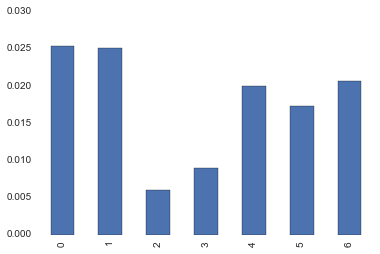

In [45]:
df.avgViolence.plot(kind = "bar")